In [50]:
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt

# **APS 5 - Intervalos de confiança**

### *Luigi Orlandi, Andre Oliveira e Deena El Orra*

In [51]:
df = pd.read_csv("data/Rocket Data.csv", encoding="utf-8", delimiter=";", skiprows=0, decimal = ".")

df["Avg. Players"] = df["Avg. Players"].str.replace(',', '').astype(float)
df["Peak Players"] = df["Peak Players"].str.replace(',', '').astype(float)
df["Gain"] = df["Gain"].str.replace(',', '').astype(float)
df["% Gain"] = df["% Gain"].str.replace('%', '')

df_covid = df.iloc[26:43] 
df_covid


,Month,Avg. Players,Gain,% Gain,Peak Players
26,July 2021,36164.4,-3409.0,-8.61,66502.0
27,June 2021,39573.4,-5742.1,-12.67,73369.0
28,May 2021,45315.5,-8291.2,-15.47,88665.0
29,April 2021,53606.7,3112.8,+6.16,110344.0
30,March 2021,50493.8,-3229.2,-6.01,94672.0
31,February 2021,53723.0,-5726.1,-9.63,103429.0
32,January 2021,59449.2,-6315.9,-9.60,112482.0
33,December 2020,65765.1,-1785.3,-2.64,135714.0
34,November 2020,67550.4,-4805.2,-6.64,128577.0
35,October 2020,72355.6,19247.4,+36.24,140667.0


### **Etapas para o calculo de um intervalo de confiança**

1. Primeiramente calculamos a média dos valores totais observados

2. Em segundo lugar contamos o número de ocorrência destes valores

3. Calculamos o desvio padrão dessass médias

4. Por fim adotamos a escala na qual nossos dados foram trabalhados

# Parte 1 - Intervalo de confiança 
## **Média de jogadores mensais**

In [52]:
x_bar = df["Avg. Players"].mean()
n = df["Avg. Players"].count()
s = df["Avg. Players"].std()
escala = s/math.sqrt(n)

print(x_bar)

33124.77171717171


In [53]:
a = st.t.ppf(0.025, df=len(df)-1, loc=x_bar, scale=escala)
b = st.t.ppf(0.975, df=len(df)-1, loc=x_bar, scale=escala)

print(a)
print(b)

30996.800256027258
35252.74317831616


In [64]:
# quantidade de jogadores acima na zona critica (a cima de b)

print(len(df_covid[df_covid["Avg. Players"] > b]), "de", len(df_covid))

x_bar_covid = df_covid["Avg. Players"].mean()
n_covid = df_covid["Avg. Players"].count()
s_covid = df_covid["Avg. Players"].std()
escala_covid = s/math.sqrt(n)

a_covid = st.t.ppf(0.025, df=len(df)-1, loc=x_bar_covid, scale=escala_covid)
b_covid = st.t.ppf(0.975, df=len(df)-1, loc=x_bar_covid, scale=escala_covid)

17 de 17


49020.916774149664

# Parte 2 - Intervalo de confiança
## **Ganho médio mensal**

In [55]:
# mu = df["Gain"].mean()
# n = df["Gain"].count()
# sigma = df["Gain"].std()
# escala = sigma/math.sqrt(n)

# print(mu)

In [56]:
# a = st.t.ppf(0.025, df=len(df)-1, loc=mu, scale=escala)
# b = st.t.ppf(0.975, df=len(df)-1, loc=mu, scale=escala)

# print(a)
# print(b) 

# Parte 3 - Gráficos de insights

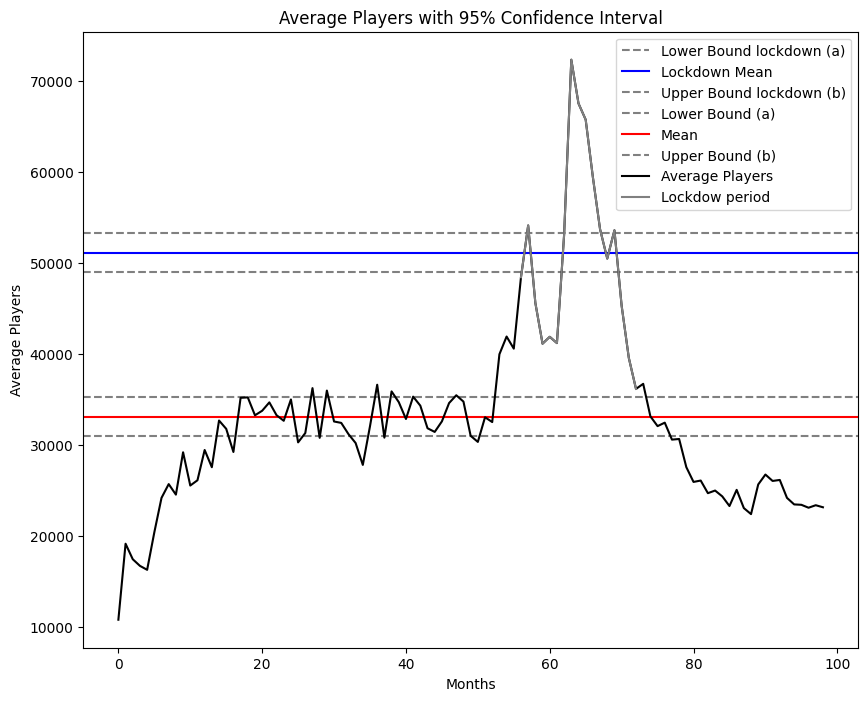

In [75]:
plot_df = df[::-1] #https://medium.com/@shouke.wei/5-practical-methods-to-reverse-the-order-of-rows-in-pandas-dataframe-942f04d19250#:~:text=Reindex%20Method,-Instead%20of%20using&text=In%20this%20code%2C%20we%20use,index%20of%20the%20reversed%20DataFrame.

plt.figure(figsize=(10, 8))
plt.errorbar(df.index, plot_df["Avg. Players"], label='Average Players', color='black')
plt.errorbar(plot_df.iloc[26:43].index, df_covid["Avg. Players"], label='Lockdown period', color='grey')
plt.axhline(a_covid, linestyle='--', color='grey', label='Lower Bound lockdown (a)')
plt.axhline(x_bar_covid, color='blue', label='Lockdown Mean')
plt.axhline(b_covid, linestyle='--', color='grey', label='Upper Bound lockdown (b)')

plt.axhline(a, linestyle='--', color='grey', label='Lower Bound (a)')
plt.axhline(x_bar, color='red', label='Mean')
plt.axhline(b, linestyle='--', color='grey', label='Upper Bound (b)')
plt.title('Average Players with 95% Confidence Interval')
plt.xlabel('Months')
plt.ylabel('Average Players')
plt.legend()
plt.show()